<a href="https://colab.research.google.com/github/Miguel743/proyectosDatos/blob/main/PARTE_2_SeleccionVariables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install funpymodeling
!pip install pandas==1.2
!pip install pandas-profiling==2.7.1

import pandas as pd
from pandas_profiling import ProfileReport
from google.colab.data_table import DataTable
from funpymodeling.exploratory import status, profiling_num, freq_tbl, cat_vars,num_vars 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data10= pd.read_csv('/content/drive/MyDrive/data/data10.csv')

In [ ]:
data10= data10.drop(['Unnamed: 0'], axis=1)
data10.columns

Index(['salario_mensual_o_retiro_bruto_en_tu_moneda_local',
       'anos_de_experiencia', 'anos_en_la_empresa_actual',
       'anos_en_el_puesto_actual', 'tipo_de_contrato',
       'nivel_de_estudios_alcanzado', 'estado',
       'realizaste_cursos_de_especializacion', 'seniority',
       'tiene_gente_a_cargo', 'trabajo_de_02', 'carrera_02', 'universidad_02',
       'salario_bruto'],
      dtype='object')

In [ ]:
ProfileReport(data10)

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

ALGUNAS CONCLUSIONES 


*   Al observar la columna de 'salario bruto' del indicador **Cramer's V** vemos tres variables con una correlación significativa con el 'salario bruto', a saber: 'tipo de contrato', 'seniority', 'trabajo_02'. Y una cuarta 'gente a cargo' con una correlación no tan significactiva como las anteriores. Es decir que, de acuerdo con este indicador, podemos considerar a las variables mencionadas como buenas predictoras. 
*   Observando la columna de 'salario bruto' del indicador **PhiK** vemos cinco variables con una correlación significativa con el 'salario bruto', a saber: 'años de experiencia', 'tipo de contrato', 'seniority', 'trabajo_02'y 'gente a cargo'. Es decir que, de acuerdo con este indicador, podemos considerar a las variables mencionadas como buenas predictoras. 
*   Si nos concentramos en el indicador de **Pearson** vemos que nos marca una fuerte correlación positiva entre 'años de experiencia' y 'salario bruto en moneda local'.
*   Concluimos que existe un mensaje coherente entre los resultados arrojados por los distintos indicadores y los obtenidos mediante análisis bivariado.



In [ ]:
# Obtenemos los coeficientes de Pearson. 
data10.corr().round(2)

salario_mensual_o_retiro_bruto_en_tu_moneda_local  \
salario_mensual_o_retiro_bruto_en_tu_moneda_local                                               1.00   
anos_de_experiencia                                                                             0.34   
anos_en_la_empresa_actual                                                                       0.03   
anos_en_el_puesto_actual                                                                        0.03   

                                                   anos_de_experiencia  \
salario_mensual_o_retiro_bruto_en_tu_moneda_local                 0.34   
anos_de_experiencia                                               1.00   
anos_en_la_empresa_actual                                         0.47   
anos_en_el_puesto_actual                                          0.49   

                                                   anos_en_la_empresa_actual  \
salario_mensual_o_retiro_bruto_en_tu_moneda_local                       0.03   
anos_de_experiencia                                                     0.47   
anos_en_la_empresa_actual                                               1.00   
anos_en_el_puesto_actual                                                0.56   

                                                   anos_en_el_puesto_actual  
salario_mensual_o_retiro_bruto_en_tu_moneda_local                      0.03  
anos_de_experiencia                                                    0.49  
anos_en_la_empresa_actual                                              0.56  
anos_en_el_puesto_actual                                               1.00

In [ ]:
# Obtenemos los coeficientes de correlacion simple R y de determinación R^2
from funpymodeling.exploratory import corr_pair
cor_d= corr_pair(data10)
DataTable(cor_d)

In [ ]:
data11= data10.drop(['anos_en_la_empresa_actual','anos_en_el_puesto_actual','nivel_de_estudios_alcanzado', 'estado','realizaste_cursos_de_especializacion','carrera_02', 'universidad_02'], axis=1)
data11.columns
data11.to_excel('/content/drive/MyDrive/data/data11.xlsx')

In [ ]:
# Otro enfoque seria estudiar la correlacion transformando previamente las variables categoricas a numericas utilizando variables dummies
data12= pd.get_dummies(data11, drop_first= True)
status(data12)

variable  q_nan  p_nan  q_zeros  \
0   salario_mensual_o_retiro_bruto_en_tu_moneda_local      0    0.0        0   
1                                 anos_de_experiencia      0    0.0      462   
2                          tipo_de_contrato_Full-Time      0    0.0      852   
3                          tipo_de_contrato_Part-Time      0    0.0     5474   
4   tipo_de_contrato_Participación societaria en u...      0    0.0     5719   
5      tipo_de_contrato_Remoto (empresa de otro país)      0    0.0     5457   
6   tipo_de_contrato_Tercerizado (trabajo a través...      0    0.0     5562   
7                               seniority_Semi-Senior      0    0.0     4364   
8                                    seniority_Senior      0    0.0     2801   
9                            seniority_nulo_seniority      0    0.0     5730   
10                             tiene_gente_a_cargo_Sí      0    0.0     4259   
11            trabajo_de_02_BI Analyst / Data Analyst      0    0.0     5577   
12                     trabajo_de_02_Business Analyst      0    0.0     5634   
13                           trabajo_de_02_Consultant      0    0.0     5630   
14                            trabajo_de_02_Developer      0    0.0     3391   
15                             trabajo_de_02_HelpDesk      0    0.0     5589   
16                   trabajo_de_02_Manager / Director      0    0.0     5491   
17                      trabajo_de_02_Project Manager      0    0.0     5542   
18                          trabajo_de_02_QA / Tester      0    0.0     5478   
19              trabajo_de_02_SysAdmin / DevOps / SRE      0    0.0     5116   
20                     trabajo_de_02_Technical Leader      0    0.0     5380   
21                                trabajo_de_02_other      0    0.0     4629   
22                                 salario_bruto_BAJO      0    0.0     1475   

     p_zeros  unique     type  
0   0.000000    1219  float64  
1   0.080586      23    int64  
2   0.148613       2    uint8  
3   0.954823       2    uint8  
4   0.997558       2    uint8  
5   0.951858       2    uint8  
6   0.970173       2    uint8  
7   0.761207       2    uint8  
8   0.488575       2    uint8  
9   0.999477       2    uint8  
10  0.742892       2    uint8  
11  0.972789       2    uint8  
12  0.982732       2    uint8  
13  0.982034       2    uint8  
14  0.591488       2    uint8  
15  0.974882       2    uint8  
16  0.957788       2    uint8  
17  0.966684       2    uint8  
18  0.955521       2    uint8  
19  0.892377       2    uint8  
20  0.938427       2    uint8  
21  0.807431       2    uint8  
22  0.257282       2    uint8

In [ ]:
data12.to_excel('/content/drive/MyDrive/data/data12.xlsx')
data12.shape

(5733, 23)

In [ ]:
data12.corr()

salario_mensual_o_retiro_bruto_en_tu_moneda_local  \
salario_mensual_o_retiro_bruto_en_tu_moneda_local                                            1.000000   
anos_de_experiencia                                                                          0.340985   
tipo_de_contrato_Full-Time                                                                  -0.074604   
tipo_de_contrato_Part-Time                                                                  -0.206806   
tipo_de_contrato_Participación societaria en un...                                          -0.015098   
tipo_de_contrato_Remoto (empresa de otro país)                                               0.354281   
tipo_de_contrato_Tercerizado (trabajo a través ...                                          -0.017379   
seniority_Semi-Senior                                                                       -0.032574   
seniority_Senior                                                                             0.340390   
seniority_nulo_seniority                                                                    -0.003078   
tiene_gente_a_cargo_Sí                                                                       0.209584   
trabajo_de_02_BI Analyst / Data Analyst                                                     -0.064112   
trabajo_de_02_Business Analyst                                                              -0.037808   
trabajo_de_02_Consultant                                                                    -0.044568   
trabajo_de_02_Developer                                                                     -0.072629   
trabajo_de_02_HelpDesk                                                                      -0.140744   
trabajo_de_02_Manager / Director                                                             0.219660   
trabajo_de_02_Project Manager                                                                0.055698   
trabajo_de_02_QA / Tester                                                                   -0.045877   
trabajo_de_02_SysAdmin / DevOps / SRE                                                       -0.014044   
trabajo_de_02_Technical Leader                                                               0.168700   
trabajo_de_02_other                                                                         -0.041320   
salario_bruto_BAJO                                                                          -0.827409   

                                                    anos_de_experiencia  \
salario_mensual_o_retiro_bruto_en_tu_moneda_local              0.340985   
anos_de_experiencia                                            1.000000   
tipo_de_contrato_Full-Time                                     0.061997   
tipo_de_contrato_Part-Time                                    -0.102099   
tipo_de_contrato_Participación societaria en un...             0.012213   
tipo_de_contrato_Remoto (empresa de otro país)                -0.016639   
tipo_de_contrato_Tercerizado (trabajo a través ...            -0.026133   
seniority_Semi-Senior                                         -0.339584   
seniority_Senior                                               0.806788   
seniority_nulo_seniority                                       0.050077   
tiene_gente_a_cargo_Sí                                         0.294659   
trabajo_de_02_BI Analyst / Data Analyst                       -0.079741   
trabajo_de_02_Business Analyst                                 0.005746   
trabajo_de_02_Consultant                                       0.008207   
trabajo_de_02_Developer                                       -0.255840   
trabajo_de_02_HelpDesk                                        -0.045725   
trabajo_de_02_Manager / Director                               0.236092   
trabajo_de_02_Project Manager                                  0.109498   
trabajo_de_02_QA / Tester                                     -0.082039   
trabajo_de_02_SysAdmin / DevOps

In [ ]:
cor_d= corr_pair(data12)
DataTable(cor_d)

In [ ]:
ProfileReport(data12)

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

CONCLUSIONES

*👽  Observando la columna de 'salario bruto en moneda local' del indicador Pearson vemos que se mantiene una correlación positiva significtiva con: 'años de experincia', 'tipo de contrato remoto', 'Seniority Senior'. 
Luego vemos una correlación más débil con:'tiene_gente_a_cargo_Sí', 'trabajo_de_02_Manager / Director',  'trabajo_de_02_Technical Leader'.

*👽  Por otro lado guarda un correlación negativa con: 'tipo_de_contrato_Part-Time','trabajo_de_02_HelpDesk'.

In [ ]:
data13= data12.drop([
       'tipo_de_contrato_Full-Time',
       'tipo_de_contrato_Participación societaria en una cooperativa',
       'tipo_de_contrato_Tercerizado (trabajo a través de consultora o agencia)',
       'seniority_Semi-Senior','seniority_nulo_seniority',
       'trabajo_de_02_BI Analyst / Data Analyst',
       'trabajo_de_02_Business Analyst', 'trabajo_de_02_Consultant',
       'trabajo_de_02_Developer',
       'trabajo_de_02_Project Manager',
       'trabajo_de_02_QA / Tester', 'trabajo_de_02_SysAdmin / DevOps / SRE',
       'trabajo_de_02_other'],axis= 1)

In [ ]:
ProfileReport(data13)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data13.corr().round(2)
# Podemos observar que el coeficiente de correlacion simple entre 'años de experiencia' y 'seniority senior' es elevado (0.81)
# Esto implica que debamos seleccionar un de las dos al momento de realzar el modelo predictivo.

salario_mensual_o_retiro_bruto_en_tu_moneda_local  \
salario_mensual_o_retiro_bruto_en_tu_moneda_local                                               1.00   
anos_de_experiencia                                                                             0.34   
tipo_de_contrato_Part-Time                                                                     -0.21   
tipo_de_contrato_Remoto (empresa de otro país)                                                  0.35   
seniority_Senior                                                                                0.34   
tiene_gente_a_cargo_Sí                                                                          0.21   
trabajo_de_02_HelpDesk                                                                         -0.14   
trabajo_de_02_Manager / Director                                                                0.22   
trabajo_de_02_Technical Leader                                                                  0.17   
salario_bruto_BAJO                                                                             -0.83   

                                                   anos_de_experiencia  \
salario_mensual_o_retiro_bruto_en_tu_moneda_local                 0.34   
anos_de_experiencia                                               1.00   
tipo_de_contrato_Part-Time                                       -0.10   
tipo_de_contrato_Remoto (empresa de otro país)                   -0.02   
seniority_Senior                                                  0.81   
tiene_gente_a_cargo_Sí                                            0.29   
trabajo_de_02_HelpDesk                                           -0.05   
trabajo_de_02_Manager / Director                                  0.24   
trabajo_de_02_Technical Leader                                    0.14   
salario_bruto_BAJO                                               -0.27   

                                                   tipo_de_contrato_Part-Time  \
salario_mensual_o_retiro_bruto_en_tu_moneda_local                       -0.21   
anos_de_experiencia                                                     -0.10   
tipo_de_contrato_Part-Time                                               1.00   
tipo_de_contrato_Remoto (empresa de otro país)                          -0.05   
seniority_Senior                                                        -0.11   
tiene_gente_a_cargo_Sí                                                  -0.05   
trabajo_de_02_HelpDesk                                                   0.07   
trabajo_de_02_Manager / Director                                        -0.02   
trabajo_de_02_Technical Leader                                          -0.05   
salario_bruto_BAJO                                                       0.12   

                                                   tipo_de_contrato_Remoto (empresa de otro país)  \
salario_mensual_o_retiro_bruto_en_tu_moneda_local                                            0.35   
anos_de_experiencia                                                                         -0.02   
tipo_de_contrato_Part-Time                                                                  -0.05   
tipo_de_contrato_Remoto (empresa de otro país)                                               1.00   
seniority_Senior                                                                             0.00   
tiene_gente_a_cargo_Sí                                                                      -0.04   
trabajo_de_02_HelpDesk                                                                      -0.02   
trabajo_de_02_Manager / Director                                                            -0.04   
trabajo_de_02_Technical Leader                                                              -0.00   
salario_bruto_BAJO                                                                          -0.28   

                                                   seniority_Senior  \
salario_mensual_

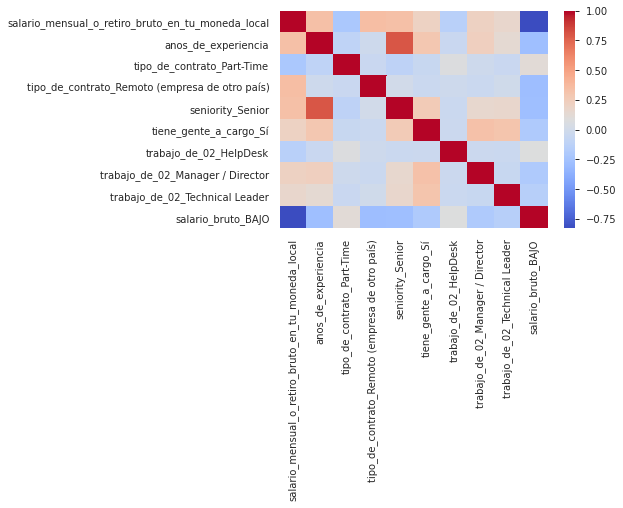

In [ ]:
sns.heatmap(data13.corr(), cmap='coolwarm');

In [ ]:
# Exploramos la asociacion de las variables ultilizando TEORIA DE LA INFORMACION. 
# Tratamos de identificar asociaciones fuertes que no aparecieron con el estadistico de Pearson.
%%capture
!pip install minepy
from __future__ import division
import numpy as np
from minepy import MINE

In [ ]:
import itertools
col_pairs=list(itertools.combinations(data12.columns, 2))

df_res = pd.DataFrame()

for a,b in col_pairs:
    mine = MINE(alpha=0.6, c=15, est="mic_approx")
    mine.compute_score(data12[a], data12[b])
    df_res=df_res.append({"v1":a, "v2":b, "mic":mine.mic()}, ignore_index=True)
DataTable(df_res)


*👽  Vemos que se confirman las asociaciones entre 'salario bruto mensual' con 'años de experiencia' y 'seniority senior'. Tambien se confirma la relacion fuerte entre estas últimas dos.

*👽  Como novedad aparece una fuerte relacion entre 'años de experiencia' y 'seniority Semisenior'